<a href="https://colab.research.google.com/github/dushyanthbommana/CE888/blob/main/Assignment2/Essex_policedata_3_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Analysis: Is the UK Police Biased?

### Introduction

Many people in UK are blaming that UK Police is biased towards a particular group of people like any particular ethnicity, particular age group, particular gender, etc. This is the summarized analysis of the UK Police Criminal Dataset to find whether the UK Police is biased or not.    
   
Organisation which deals with the complaints against police in UK has published a review that there are many complaints that police force discriminate against black minorities and this matter sparked most following the Black Lives Matter protests. Black people were more likely to stopped and searched than white people in 2016-17 according to a study in 2018 by drugs charity and the London School of Economics.
So, it’s important to find out whether these allegations are right or wrong for other crimes as well. The dataset which is used for analysis has been downloaded from following UK government website (https://data.gov.uk/dataset/f92e60cd-ea9d-4561-b8df-ba979bda82eb/arrests-by-ethnicity). 

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Reading the dataset in a dataframe
data = pd.read_csv('https://raw.githubusercontent.com/dushyanthbommana/CE888/main/number-of-arrests.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Preprocessing

In [3]:
# dataset
data

,Measure,Time,Time_type,Ethnicity,Ethnicity_type,Gender,Gender_type,Age_Group,Age_Group_type,Geography,Geography_type,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)","Rate per 1,000 population by ethnicity, gender, and PFA","Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)",Notes
0,Number of arrests,2006/07,Financial year,Asian,ONS 2001 5+1,Female,Male/Female,10 - 17 years,Arrest age group categories,Avon and Somerset,Police Force Area,10,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN
1,Number of arrests,2006/07,Financial year,Asian,ONS 2001 5+1,Female,Male/Female,10 - 17 years,Arrest age group categories,Bedfordshire,Police Force Area,25,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN
2,Number of arrests,2006/07,Financial year,Asian,ONS 2001 5+1,Female,Male/Female,10 - 17 years,Arrest age group categories,Cambridgeshire,Police Force Area,9,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN
3,Number of arrests,2006/07,Financial year,Asian,ONS 2001 5+1,Female,Male/Female,10 - 17 years,Arrest age group categories,Cheshire,Police Force Area,-,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN
4,Number of arrests,2006/07,Financial year,Asian,ONS 2001 5+1,Female,Male/Female,10 - 17 years,Arrest age group categories,Cleveland,Police Force Area,4,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99910,Number of arrests,2013/14,Financial year,Any other black background,ONS 2001 16+1,Male,Male/Female,21 years and over,Arrest age group categories,Hampshire,Police Force Area,143,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN
99911,Number of arrests,2013/14,Financial year,Any other black background,ONS 2001 16+1,Male,Male/Female,21 years and over,Arrest age group categories,Hertfordshire,Police Force Area,168,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN
99912,Number of arrests,2013/14,Financial year,Any other black background,ONS 2001 16+1,Male,Male/Female,21 years and over,Arrest age group categories,Humberside,Police Force Area,73,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN
99913,Number of arrests,2013/14,Financial year,Any other black background,ONS 2001 16+1,Male,Male/Female,21 years and over,Arrest age group categories,Kent,Police Force Area,206,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN


Dataset have total 218592 rows and 16 columns. There are some columns which are not require for our purpose, let's find out them and drop from the dataset.

There are some columns which has same values in all rows so there is no need of these columns in analysis

In [4]:
# Measure column has only one value 'Number of arrests'
data.Measure.unique()

array(['Number of arrests'], dtype=object)

In [5]:
# Gender_type column has only one value 'Male/Female'
data.Gender_type.unique()

array(['Male/Female'], dtype=object)

In [6]:
# Age_Group_type column has only one value 'Arrest age group categories'
data.Age_Group_type.unique()

array(['Arrest age group categories'], dtype=object)

In [7]:
# Geography_type column has only one value 'Police Force Area'
data.Geography_type.unique()

array(['Police Force Area'], dtype=object)

In [ ]:
# Notes column has nan value in most of the rows so this one is also not require
data.Notes.unique()

array([nan,
       'This force could not supply detailed ethnicity data in this year.',
       'Data estimated as the force were unable to supply any data in this year.',
       'Lancashire could not supply any arrests data in 2017/18',
       'Excludes Lancashire (both arrest and population data), who were unable to provide data in this year',
       "Arrest rate per 1,000 population has not been calculated for the City of London Police due to the small resident population relative to the visiting 'daytime' population."],
      dtype=object)

In [ ]:
# dropping following columns from our dataset.
drop_columns = ['Measure', 'Gender_type', 'Age_Group_type', 'Geography_type', 'Notes']
data.drop(drop_columns, axis = 1, inplace=True)
data

,Time,Time_type,Ethnicity,Ethnicity_type,Gender,Age_Group,Geography,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)","Rate per 1,000 population by ethnicity, gender, and PFA","Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)"
0,2006/07,Financial year,Asian,ONS 2001 5+1,Female,10 - 17 years,Avon and Somerset,10,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups
1,2006/07,Financial year,Asian,ONS 2001 5+1,Female,10 - 17 years,Bedfordshire,25,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups
2,2006/07,Financial year,Asian,ONS 2001 5+1,Female,10 - 17 years,Cambridgeshire,9,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups
3,2006/07,Financial year,Asian,ONS 2001 5+1,Female,10 - 17 years,Cheshire,-,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups
4,2006/07,Financial year,Asian,ONS 2001 5+1,Female,10 - 17 years,Cleveland,4,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups
...,...,...,...,...,...,...,...,...,...,...,...
218587,2013/14,Financial year,Mixed White and Asian,ONS 2001 16+1,All,All,All,"2,906","3,41,727",9,0.30%
218588,2014/15,Financial year,Mixed White and Asian,ONS 2001 16+1,All,All,All,"2,711","3,41,727",8,0.30%
218589,2015/16,Financial year,Mixed White and Asian,ONS 2001 16+1,All,All,All,"2,532","3,41,727",7,0.30%
218590,2016/17,Financial year,Mixed White and Asian,ONS 2001 16+1,All,All,All,"2,289","3,41,727",7,0.30%


As we can see above these columns ['Measure', 'Gender_type', 'Age_Group_type', 'Geography_type', 'Notes'] have been dropped from our dataset.

Let's remove any forward and backward white spaces from remaining columns name

In [ ]:
# columns in our dataset
data.columns

Index(['Time', 'Time_type', 'Ethnicity', 'Ethnicity_type', 'Gender',
       'Age_Group', 'Geography', ' Number of arrests ',
       'Population by ethnicity, gender, and PFA (based on 2011 Census)',
       'Rate per 1,000 population by ethnicity, gender, and PFA',
       'Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)'],
      dtype='object')

' Number of arrests ' this column have forward and backward white spaces. Let's remove these white spaces

In [ ]:
data.rename(columns={' Number of arrests ':'Number of arrests'}, inplace=True)
data.columns

Index(['Time', 'Time_type', 'Ethnicity', 'Ethnicity_type', 'Gender',
       'Age_Group', 'Geography', 'Number of arrests',
       'Population by ethnicity, gender, and PFA (based on 2011 Census)',
       'Rate per 1,000 population by ethnicity, gender, and PFA',
       'Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)'],
      dtype='object')

**Making the data perfect for analysis**

The columns which have numeric values are in the string representation format like '2,906'. Let's remove the ',' sign and make it integer.

In [ ]:
# Function to process the numeric value columns
def process_column(column):
    temp = []
    for i in column:
        try:
            value = i.replace(',','').replace('-','').replace('%','')
            value = float(value)
            temp.append(value)
        except:
            value = np.NaN
            temp.append(value)

    return temp

**Number of arrests** column

In [ ]:
data['Number of arrests']

0            10
1            25
2             9
3          -   
4             4
          ...  
218587    2,906
218588    2,711
218589    2,532
218590    2,289
218591    2,144
Name: Number of arrests, Length: 218592, dtype: object

In [ ]:
# removing ',' and replacing '-' and ' ' with NaN(Not a number)
data['Number of arrests'] = process_column(data['Number of arrests'])
data['Number of arrests']

0           10.0
1           25.0
2            9.0
3            NaN
4            4.0
           ...  
218587    2906.0
218588    2711.0
218589    2532.0
218590    2289.0
218591    2144.0
Name: Number of arrests, Length: 218592, dtype: float64

**Population by ethnicity, gender, and PFA (based on 2011 Census)** column

In [ ]:
data['Population by ethnicity, gender, and PFA (based on 2011 Census)']

0          N/A for individual age groups 
1          N/A for individual age groups 
2          N/A for individual age groups 
3          N/A for individual age groups 
4          N/A for individual age groups 
                       ...               
218587                           3,41,727
218588                           3,41,727
218589                           3,41,727
218590                           3,41,727
218591                           3,35,719
Name: Population by ethnicity, gender, and PFA (based on 2011 Census), Length: 218592, dtype: object

In [ ]:
# removing ',' and replacing 'N/A for individual age groups' with NaN
data['Population by ethnicity, gender, and PFA (based on 2011 Census)'] = process_column(data['Population by ethnicity, gender, and PFA (based on 2011 Census)'])
data['Population by ethnicity, gender, and PFA (based on 2011 Census)']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
218587    341727.0
218588    341727.0
218589    341727.0
218590    341727.0
218591    335719.0
Name: Population by ethnicity, gender, and PFA (based on 2011 Census), Length: 218592, dtype: float64

**Rate per 1,000 population by ethnicity, gender, and PFA** column

In [ ]:
# removing ','
data['Rate per 1,000 population by ethnicity, gender, and PFA'] = process_column(data['Rate per 1,000 population by ethnicity, gender, and PFA'])
data['Rate per 1,000 population by ethnicity, gender, and PFA']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
218587    9.0
218588    8.0
218589    7.0
218590    7.0
218591    6.0
Name: Rate per 1,000 population by ethnicity, gender, and PFA, Length: 218592, dtype: float64

**Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)** column

In [ ]:
data['Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)']

0         N/A for individual age groups
1         N/A for individual age groups
2         N/A for individual age groups
3         N/A for individual age groups
4         N/A for individual age groups
                      ...              
218587                            0.30%
218588                            0.30%
218589                            0.30%
218590                            0.30%
218591                            0.30%
Name: Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported), Length: 218592, dtype: object

In [ ]:
# removing ',' and replacing 'N/A for individual age groups' with NaN
data['Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)'] \
=process_column(data['Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)'])
data['Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
218587    0.3
218588    0.3
218589    0.3
218590    0.3
218591    0.3
Name: Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported), Length: 218592, dtype: float64

### EDA( Exploratory Data Analysis )

Visualizing data based on ethnicity

In [ ]:
# finding total arrests for each ethnic group
Ethnicity = data.groupby('Ethnicity').sum()[['Number of arrests', 'Population by ethnicity, gender, and PFA (based on 2011 Census)']].reset_index()
Ethnicity

,Ethnicity,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)"
0,All,109806032.0,2.690006e+09
1,Any other asian,1638600.0,4.010199e+07
2,Any other black background,1983560.0,1.345921e+07
3,Any other ethnic group,1324488.0,2.704936e+07
4,Any other mixed/multiple ethnic background,882712.0,1.391375e+07
5,Any other white background,6901592.0,1.220313e+08
6,Asian,6394760.0,1.833625e+08
7,Bangladeshi,921592.0,2.145251e+07
8,Black,9021184.0,8.951009e+07
9,Black African,3482984.0,4.749710e+07


In [ ]:
# adding arrest percentage of total ethnic population
Ethnicity['Arrest percentage'] = (Ethnicity['Number of arrests']\
                                /Ethnicity['Population by ethnicity, gender, and PFA (based on 2011 Census)'])*100
Ethnicity

,Ethnicity,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)",Arrest percentage
0,All,109806032.0,2.690006e+09,4.082000
1,Any other asian,1638600.0,4.010199e+07,4.086082
2,Any other black background,1983560.0,1.345921e+07,14.737563
3,Any other ethnic group,1324488.0,2.704936e+07,4.896559
4,Any other mixed/multiple ethnic background,882712.0,1.391375e+07,6.344170
5,Any other white background,6901592.0,1.220313e+08,5.655593
6,Asian,6394760.0,1.833625e+08,3.487497
7,Bangladeshi,921592.0,2.145251e+07,4.295963
8,Black,9021184.0,8.951009e+07,10.078399
9,Black African,3482984.0,4.749710e+07,7.333045


In [ ]:
# dropping rows which have infinite values
Ethnicity.drop(19,axis=0, inplace=True)
Ethnicity.reset_index(drop=True, inplace=True)
Ethnicity

,Ethnicity,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)",Arrest percentage
0,All,109806032.0,2.690006e+09,4.082000
1,Any other asian,1638600.0,4.010199e+07,4.086082
2,Any other black background,1983560.0,1.345921e+07,14.737563
3,Any other ethnic group,1324488.0,2.704936e+07,4.896559
4,Any other mixed/multiple ethnic background,882712.0,1.391375e+07,6.344170
5,Any other white background,6901592.0,1.220313e+08,5.655593
6,Asian,6394760.0,1.833625e+08,3.487497
7,Bangladeshi,921592.0,2.145251e+07,4.295963
8,Black,9021184.0,8.951009e+07,10.078399
9,Black African,3482984.0,4.749710e+07,7.333045


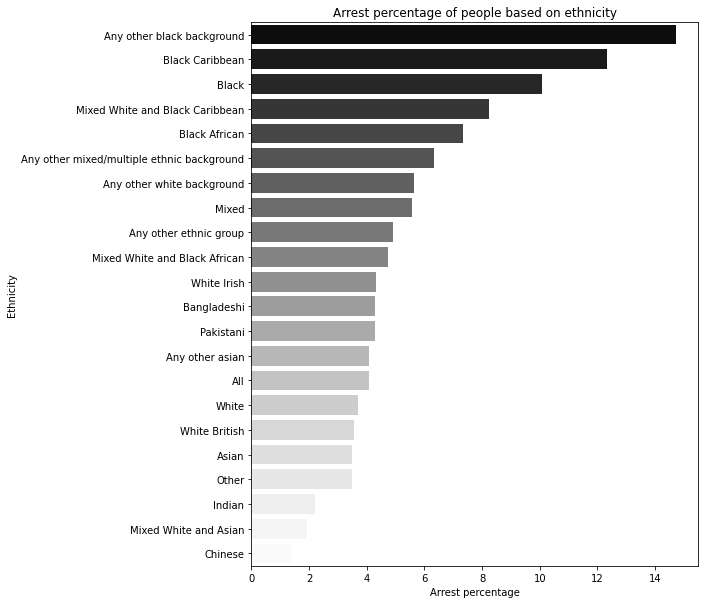

In [ ]:
Ethnicity = Ethnicity.sort_values(by='Arrest percentage')[::-1]
plt.figure(figsize=(8,10))
sns.barplot(data=Ethnicity, x='Arrest percentage', y='Ethnicity', palette='Greys_r')
plt.title('Arrest percentage of people based on ethnicity')
plt.show()

As we can see in the above graph that there is an exponential growth after 'Any other mixed/multiple ethnic background'. It shows that the arrest percentage is high for people belong to black ethnicity. It shows that arresting is biased towards black ethnic people.

Let's deep dive more in black people arrest percentage and analyse data per financial year and find out in which financial year Police was more biased.

In [ ]:
# filtering out the data for ['Black African', 'Mixed White and Black Caribbean', 'Black', 'Black Caribbean',
# 'Any other black background'] people.
black = data[data['Ethnicity'].isin(['Black African', 'Mixed White and Black Caribbean', 'Black', 'Black Caribbean',
                                      'Any other black background'])].reset_index(drop=True)
black

,Time,Time_type,Ethnicity,Ethnicity_type,Gender,Age_Group,Geography,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)","Rate per 1,000 population by ethnicity, gender, and PFA","Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)"
0,2006/07,Financial year,Black,ONS 2001 5+1,Female,10 - 17 years,Avon and Somerset,60.0,NaN,NaN,NaN
1,2006/07,Financial year,Black,ONS 2001 5+1,Female,10 - 17 years,Bedfordshire,39.0,NaN,NaN,NaN
2,2006/07,Financial year,Black,ONS 2001 5+1,Female,10 - 17 years,Cambridgeshire,15.0,NaN,NaN,NaN
3,2006/07,Financial year,Black,ONS 2001 5+1,Female,10 - 17 years,Cheshire,15.0,NaN,NaN,NaN
4,2006/07,Financial year,Black,ONS 2001 5+1,Female,10 - 17 years,Cleveland,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
47515,2016/17,Financial year,Mixed White and Black Caribbean,ONS 2001 16+1,All,All,All,12471.0,426715.0,29.0,1.8
47516,2017/18,Financial year,Any other black background,ONS 2001 16+1,All,All,All,18100.0,279850.0,65.0,2.9
47517,2017/18,Financial year,Black African,ONS 2001 16+1,All,All,All,24675.0,986940.0,25.0,3.9
47518,2017/18,Financial year,Black Caribbean,ONS 2001 16+1,All,All,All,21895.0,592723.0,37.0,3.5


In [ ]:
# grouping the filtered data according to the time and ethnicity
black = black.groupby(['Time', 'Ethnicity']).sum()[['Number of arrests', 
                                    'Population by ethnicity, gender, and PFA (based on 2011 Census)']].reset_index()
black['Arrest percentage'] = (black['Number of arrests']/black['Population by ethnicity, gender, and PFA (based on 2011 Census)'])*100
black

,Time,Ethnicity,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)",Arrest percentage
0,2006/07,Any other black background,143448.0,1121650.0,12.789016
1,2006/07,Black,841160.0,7459174.0,11.276852
2,2006/07,Black African,311768.0,3958316.0,7.876279
3,2006/07,Black Caribbean,385944.0,2379208.0,16.221533
4,2006/07,Mixed White and Black Caribbean,178328.0,1706784.0,10.448188
5,2007/08,Any other black background,157864.0,1121650.0,14.074266
6,2007/08,Black,873648.0,7459174.0,11.712396
7,2007/08,Black African,332920.0,3958316.0,8.410647
8,2007/08,Black Caribbean,382864.0,2379208.0,16.092078
9,2007/08,Mixed White and Black Caribbean,171048.0,1706784.0,10.021655


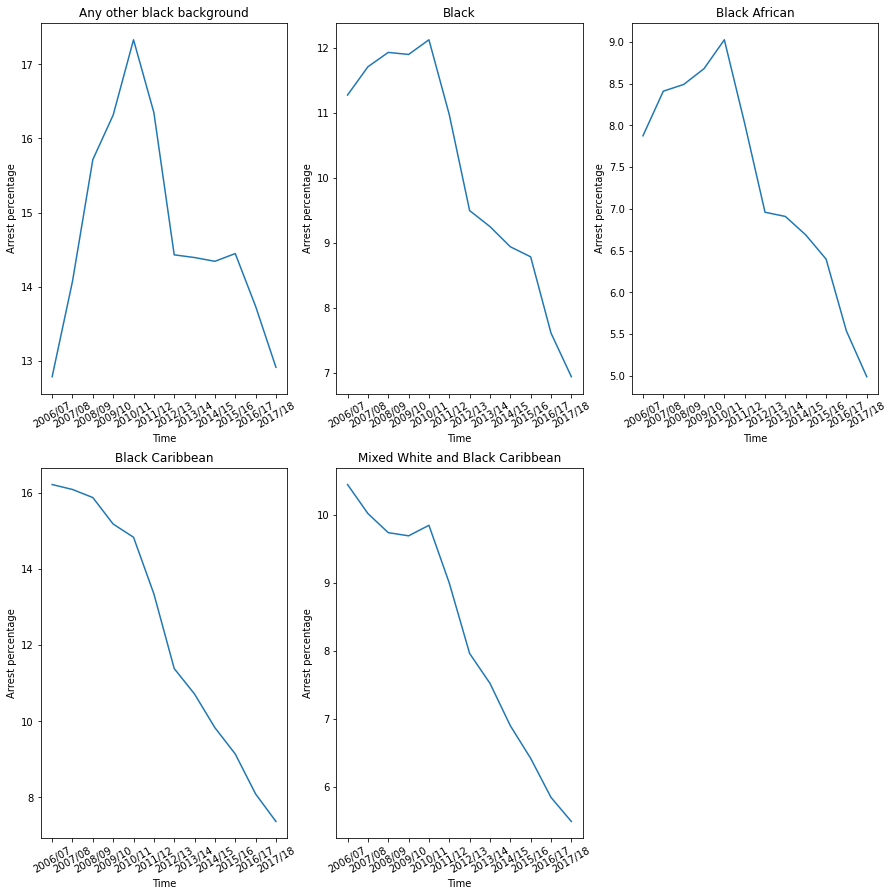

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
sns.lineplot(data=black[black['Ethnicity']=='Any other black background'], x='Time', y='Arrest percentage')
plt.xticks(rotation=30)
plt.title('Any other black background')
plt.subplot(2,3,2)
sns.lineplot(data=black[black['Ethnicity']=='Black'], x='Time', y='Arrest percentage')
plt.xticks(rotation=30)
plt.title('Black')
plt.subplot(2,3,3)
sns.lineplot(data=black[black['Ethnicity']=='Black African'], x='Time', y='Arrest percentage')
plt.xticks(rotation=30)
plt.title('Black African')
plt.subplot(2,3,4)
sns.lineplot(data=black[black['Ethnicity']=='Black Caribbean'], x='Time', y='Arrest percentage')
plt.xticks(rotation=30)
plt.title('Black Caribbean')
plt.subplot(2,3,5)
sns.lineplot(data=black[black['Ethnicity']=='Mixed White and Black Caribbean'], x='Time', y='Arrest percentage')
plt.xticks(rotation=30)
plt.title('Mixed White and Black Caribbean')
plt.show()

As we can see in [Any other black background, Black, Black African] these above graphs that arrest percentage has peak in 2009/10 financial year and after that arrest percentage deracreased continuously. Hence this shows Arresting was more biased before 2009/10.

**Visualizing data based on Gender**

In [ ]:
# grouping data based on gender
Ethnicity_gender = data.groupby(['Ethnicity','Gender']).sum()[['Number of arrests', 'Population by ethnicity, gender, and PFA (based on 2011 Census)']].reset_index()
Ethnicity_gender

,Ethnicity,Gender,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)"
0,All,All,54903016.0,1.344272e+09
1,All,Female,8818548.0,6.840215e+08
2,All,Male,46084468.0,6.617119e+08
3,Any other asian,All,819300.0,2.004726e+07
4,Any other asian,Female,77376.0,1.028471e+07
...,...,...,...,...
64,White British,Female,6587028.0,5.511842e+08
65,White British,Male,31873908.0,5.319973e+08
66,White Irish,All,550132.0,1.273498e+07
67,White Irish,Female,88204.0,6.638904e+06


There are Data for Male, Female and combined as well so dropping rows with combined values.

In [ ]:
Gender = pd.DataFrame(columns=['Gender','Number of arrests'])
Gender['Number of arrests'] = [Ethnicity_gender[Ethnicity_gender['Gender']=='Male']['Number of arrests'].sum(),
                               Ethnicity_gender[Ethnicity_gender['Gender']=='Female']['Number of arrests'].sum()]
Gender['Gender'] = ['Male', 'Female']
Gender

,Gender,Number of arrests
0,Male,136298728.0
1,Female,26071812.0


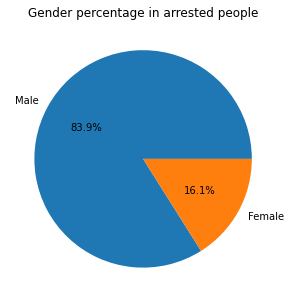

In [ ]:
plt.figure(figsize=(5,5))
Gender['Number of arrests'].plot.pie(autopct="%.1f%%", labels=Gender['Gender'])
plt.ylabel('')
plt.title('Gender percentage in arrested people')
plt.show()

As we can see in the piechart that there only 16% percentage female have arrested but this can't be seen as biased towards male becuase generally it has been seen that males are more involved in crimes than females so UK Police is not biased towards male.

### Visualizing Dataset based on Age-group

In [ ]:
# Grouping data based on Age_group
age_group = data.groupby('Age_Group').sum()[['Number of arrests','Population by ethnicity, gender, and PFA (based on 2011 Census)']].reset_index()
age_group['Arrest percentage'] = (age_group['Number of arrests']/age_group['Population by ethnicity, gender, and PFA (based on 2011 Census)'])*100
age_group

,Age_Group,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)",Arrest percentage
0,10 - 17 years,25016128.0,0.000000e+00,inf
1,18 - 20 years,21725900.0,0.000000e+00,inf
2,21 years and over,115417612.0,0.000000e+00,inf
3,All,162370540.0,8.071452e+09,2.011665
4,Under 10 years,11248.0,0.000000e+00,inf
5,Unknown,199652.0,0.000000e+00,inf


In [ ]:
# dropping row numbers 3 & 5
age_group.drop([3,5],axis=0, inplace=True)

In [ ]:
age_group = age_group[['Age_Group', 'Number of arrests']]
age_group

,Age_Group,Number of arrests
0,10 - 17 years,25016128.0
1,18 - 20 years,21725900.0
2,21 years and over,115417612.0
4,Under 10 years,11248.0


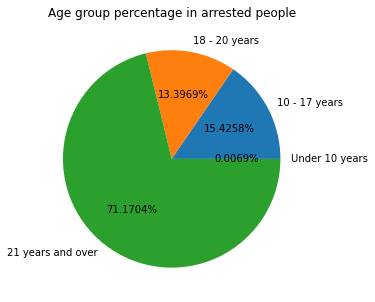

In [ ]:
plt.figure(figsize=(5,5))
age_group['Number of arrests'].plot.pie(autopct="%.4f%%", labels=age_group['Age_Group'])
plt.ylabel('')
plt.title('Age group percentage in arrested people')
plt.show()

As we can see in the above pie chart that most of the people are above 21 years old in arrested people. Age group can't be the factor to decide the biasness becuase it has been generally seen that mostly people above 20 years old are involved in crimes.

### Visualizing dataset based on geography

In [ ]:
# grouping the data based on geography...
geography = data.groupby('Geography').sum()[['Number of arrests', 'Population by ethnicity, gender, and PFA (based on 2011 Census)']].reset_index()
geography = geography[1:].reset_index(drop=True)
geography['Arrest percentage'] = (geography['Number of arrests']/geography['Population by ethnicity, gender, and PFA (based on 2011 Census)'])*100
geography.drop(22, axis=0, inplace=True)
geography.reset_index(drop=True, inplace=True)
geography

,Geography,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)",Arrest percentage
0,Avon and Somerset,4222916.0,115167960.0,3.666746
1,Bedfordshire,1843436.0,44284392.0,4.162722
2,Cambridgeshire,2088056.0,57948552.0,3.603293
3,Cheshire,2326536.0,73995048.0,3.144178
4,Cleveland,2632268.0,40120344.0,6.560931
5,Cumbria,1347872.0,35989776.0,3.745153
6,Derbyshire,2570420.0,73327536.0,3.505395
7,Devon and Cornwall,2984372.0,120111696.0,2.484664
8,Dorset,1738324.0,53570952.0,3.244900
9,Durham,2176744.0,44554032.0,4.885627


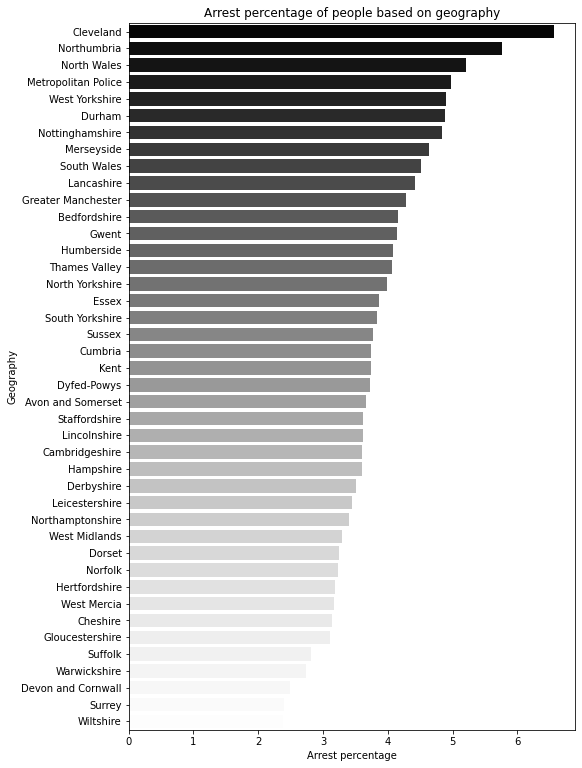

In [ ]:
geography = geography.sort_values(by='Arrest percentage')[::-1]
plt.figure(figsize=(8,13))
sns.barplot(data=geography, x='Arrest percentage', y='Geography', palette='Greys_r')
plt.title('Arrest percentage of people based on geography')
plt.show()

As we can see in the above graph that there is sudden increase in arrest percentage after Metropolitan police [from downside]. May be there is some biasness let's go more deep in geographies Morth Wales, Morthumbria and Cleveland and check data finencial year wise.

In [ ]:
# filtering out Morth Wales, Morthumbria and Cleveland data
geo = data[data['Geography'].isin(['Cleveland', 'Northumbria', 'North Wales'])].reset_index(drop=True)
geo

,Time,Time_type,Ethnicity,Ethnicity_type,Gender,Age_Group,Geography,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)","Rate per 1,000 population by ethnicity, gender, and PFA","Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)"
0,2006/07,Financial year,Asian,ONS 2001 5+1,Female,10 - 17 years,Cleveland,4.0,NaN,NaN,NaN
1,2006/07,Financial year,Asian,ONS 2001 5+1,Female,10 - 17 years,North Wales,1.0,NaN,NaN,NaN
2,2006/07,Financial year,Asian,ONS 2001 5+1,Female,10 - 17 years,Northumbria,13.0,NaN,NaN,NaN
3,2006/07,Financial year,Asian,ONS 2001 5+1,Female,18 - 20 years,Cleveland,2.0,NaN,NaN,NaN
4,2006/07,Financial year,Asian,ONS 2001 5+1,Female,18 - 20 years,North Wales,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14899,2016/17,Financial year,Mixed White and Asian,ONS 2001 16+1,All,All,North Wales,2.0,1640.0,1.0,0.0
14900,2016/17,Financial year,Mixed White and Asian,ONS 2001 16+1,All,All,Northumbria,22.0,4406.0,5.0,0.1
14901,2017/18,Financial year,Mixed White and Asian,ONS 2001 16+1,All,All,Cleveland,13.0,2173.0,6.0,0.1
14902,2017/18,Financial year,Mixed White and Asian,ONS 2001 16+1,All,All,North Wales,7.0,1640.0,4.0,0.1


In [ ]:
# grouping filtered data based on time and geography...
geo = geo.groupby(['Time', 'Geography']).sum()[['Number of arrests', 
                                    'Population by ethnicity, gender, and PFA (based on 2011 Census)']].reset_index()
geo['Arrest percentage'] = (geo['Number of arrests']/geo['Population by ethnicity, gender, and PFA (based on 2011 Census)'])*100
geo

,Time,Geography,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)",Arrest percentage
0,2006/07,Cleveland,260232.0,3343362.0,7.783542
1,2006/07,North Wales,278376.0,4127622.0,6.744222
2,2006/07,Northumbria,722452.0,8525118.0,8.474393
3,2007/08,Cleveland,267996.0,3343362.0,8.015764
4,2007/08,North Wales,273376.0,4127622.0,6.623087
5,2007/08,Northumbria,656624.0,8525118.0,7.702228
6,2008/09,Cleveland,259020.0,3343362.0,7.747291
7,2008/09,North Wales,287292.0,4127622.0,6.960230
8,2008/09,Northumbria,667536.0,8525118.0,7.830226
9,2009/10,Cleveland,254752.0,3343362.0,7.619636


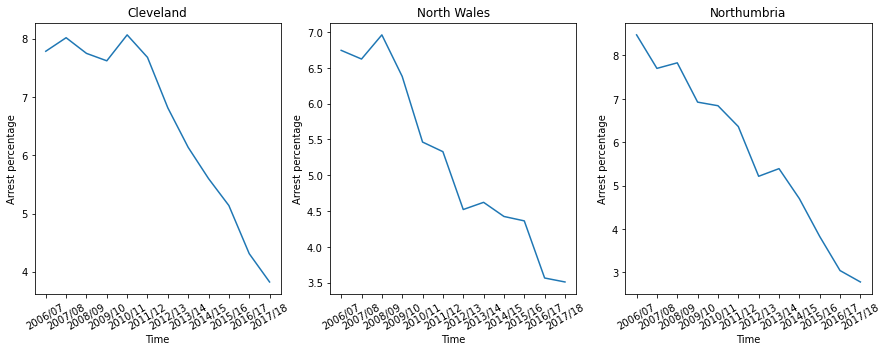

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.lineplot(data=geo[geo['Geography']=='Cleveland'], x='Time', y='Arrest percentage')
plt.title('Cleveland')
plt.xticks(rotation=30)
plt.subplot(1,3,2)
sns.lineplot(data=geo[geo['Geography']=='North Wales'], x='Time', y='Arrest percentage')
plt.xticks(rotation=30)
plt.title('North Wales')
plt.subplot(1,3,3)
sns.lineplot(data=geo[geo['Geography']=='Northumbria'], x='Time', y='Arrest percentage')
plt.title('Northumbria')
plt.xticks(rotation=30)
plt.show()

As we can see in the above graphs that there were more arrest percentage before financial year 2008/9 but after there is sudden decrease and hence UK police was more biased towards people belongs to these ['Cleveland', 'Northumbria', 'North Wales'] geographies before 2009/10.

### Conclusion    
   
We have analysed data based on Ethnicity, Gender, Age-group and Geography and found that Gender and Age-group can't be factor to decide the biasness becuase generally male above 20 years old are more involved in crimes. But UK Police were surely bias towards balck ethininc people before 2009/10 and also same with geography as well. But after 2009/10 finencial year, UK Police not found to biased.

## Thank you